# NEXT GENERATION MUSIC PREDICTOR SYSTEM 

* Problem Statement: NextGen Music system will predict how popular a new song will be. We are trying to investigate how old songs can be used to predict the popularity of the new songs based on the features of the song and their past popularity on old songs from 1991-2018. We will focus on few points like certain characteristics for hit songs and does the new song fall under this hit criteria.It can help a music company to decide the features/genre of the new music album so that it has high chances of success.

* Data Set: We have used Spotify data set for the analysis. Data set containing audio data from 1991- 2018 and 3 listener data set. Now we have merged the data of 27 years into one combined file named  "combined.csv" which we are reading on the notebook below.

In [1]:
import os
import glob 
import pandas as pd
import zipfile
# Numpy and Pandas
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Prediction
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_score, GridSeachCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier # Validation


import itertools
import copy
# Classifiers

from sklearn import svm
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Data prepping
from sklearn.preprocessing import LabelEncoder


In [2]:
#where_zip_is = '/home/alium/Downloads/'

In [3]:
#zip_ref = zipfile.ZipFile(where_zip_is+'spotify_data_for_students.zip', 'r')
#zip_ref.extractall('team23_working_dir')
#zip_ref.close()

In [4]:
#path = where_zip_is+'team23_working_dir/spotify_data_for_students/music_data'

In [5]:
# following is borrowed from https://medium.freecodecamp.org/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854
#os.chdir(path)

#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#combined_csv.to_csv( "combined_csv.csv", index=False)

In [6]:
#music = pd.read_csv(path+'/combined_csv.csv')
#Reading the merged file
music = pd.read_csv('C:/WD Jimit/MITA Spring 19/Scott/Project/spotify_data_for_students/music_data/combined_csv.csv')

C:\Users\jimaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
print(music.head(1))
print(music.shape)

  Unnamed: 0  acousticness                album_id  \
0          0         0.108  67nqYhvjDyJXGD64937Lw3   

                        album_name  \
0  The Beach Boys' Christmas Album   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5xlS...   

                                          artist_ids  \
0  3oDbviiivRWhXwIE8hxkVV,03IJEZ6IynYczgge2uC4YD,...   

                                   artist_names  danceability  disc_number  \
0  The Beach Boys,Mark Linett,Sweet,Larry Walsh         0.602          1.0   

   duration_ms   ...    popularity  preview_url                 song_id  \
0     118840.0   ...          72.0          NaN  5xlS0QkVrSH7ssEbBgBzbM   

                        song_name  speechiness    tempo  time_signature  \
0  Little Saint Nick - 1991 Remix       0.0328  130.594             4.0   

                                          track_href track_number valence  
0  https://api.spotify.com/v1/tracks/5xlS0QkVrSH7... 

### Heavy duty cleaning

In [8]:
music.isnull().sum()

Unnamed: 0              0
acousticness            1
album_id                1
album_name              1
analysis_url            1
artist_ids              1
artist_names            1
danceability            3
disc_number             1
duration_ms             1
energy                  1
instrumentalness        1
key                     1
liveness                1
loudness                1
mode                    1
popularity              1
preview_url         70211
song_id                 1
song_name               1
speechiness             3
tempo                   1
time_signature          3
track_href              1
track_number            1
valence                 3
dtype: int64

In [9]:
music_backup=music
music = music.drop(['preview_url'],axis=1)

In [10]:
music=music.dropna()
music.isnull().sum()

Unnamed: 0          0
acousticness        0
album_id            0
album_name          0
analysis_url        0
artist_ids          0
artist_names        0
danceability        0
disc_number         0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
song_id             0
song_name           0
speechiness         0
tempo               0
time_signature      0
track_href          0
track_number        0
valence             0
dtype: int64

In [11]:
music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530238 entries, 0 to 530239
Data columns (total 25 columns):
Unnamed: 0          530238 non-null object
acousticness        530238 non-null float64
album_id            530238 non-null object
album_name          530238 non-null object
analysis_url        530238 non-null object
artist_ids          530238 non-null object
artist_names        530238 non-null object
danceability        530238 non-null float64
disc_number         530238 non-null float64
duration_ms         530238 non-null float64
energy              530238 non-null float64
instrumentalness    530238 non-null float64
key                 530238 non-null float64
liveness            530238 non-null float64
loudness            530238 non-null float64
mode                530238 non-null float64
popularity          530238 non-null float64
song_id             530238 non-null object
song_name           530238 non-null object
speechiness         530238 non-null float64
tempo            

### Looks better!

* We will be dropping  unnecessary columns (Attributes) which are not required for our analysis.

In [12]:
#drop the unecessary columns
music=music.drop(['Unnamed: 0','album_id','artist_ids','song_name','artist_names','album_name','analysis_url','disc_number','duration_ms','song_id','track_href','track_number'], axis=1)

* Calculation of mean is done and this is the most important part as we will be considering the Song hit prediction based on the mean value of the popularity attribute.

In [13]:
#calculating the mean of popularity
pop_mean=music["popularity"].mean()
pop_mean

9.819801673965276

* Sorting the data based on the " Popularity Attribute " which has popularity value greater than the Mean value of the dataset. Where "1" and "0" are named as the indicator wheather it is greater than mean or not. If it is 1 then True it is greater, else "0" and new attribute is generated as "Popularity_Factor".

In [14]:
# making a series where true is entered if popularity value>mean else False
popularity_factor=music["popularity"]>pop_mean
#adding popularity factor as a column to the music dataframe with values as 0 and 1
music["Popularity_factor"]=popularity_factor.astype(int)
music.head()


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,Popularity_factor
0,0.1080,0.602,0.553,0.000000,11.0,0.0512,-9.336,1.0,72.0,0.0328,130.594,4.0,0.9710,1
1,0.4250,0.611,0.566,0.000954,9.0,0.8780,-11.715,1.0,62.0,0.0295,125.240,4.0,0.6390,1
2,0.0468,0.737,0.801,0.888000,0.0,0.1050,-9.058,1.0,18.0,0.0344,145.003,4.0,0.8590,1
3,0.9480,0.340,0.265,0.815000,8.0,0.0899,-7.477,1.0,18.0,0.0284,110.588,4.0,0.0866,1
4,0.6300,0.587,0.493,0.000000,8.0,0.2240,-8.368,1.0,53.0,0.0296,131.727,3.0,0.2100,1


In [15]:
feature_cols=['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','valence']
target_col=['Popularity_factor']
X=music[feature_cols]
Y=music['Popularity_factor']

* Splitting up of test and train data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(371166, 10)
(159072, 10)


* We are applying "Logistic Regression" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* Evaluating the model with confusion matrix and classification Report for "Logistic Regression Model".

In [19]:
import numpy as np
from sklearn.metrics import classification_report
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Confusion Matrix:")
print(matrix)
report = classification_report(Y_test, predicted)
print("Classification Report:")
print(report)
accuracy=np.mean(predicted==Y_test)
print("Accuracy is: ",accuracy)

#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#The recall is the ratio t / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
#The support is the number of occurrences of each class in y_true.

Confusion Matrix:
[[88818  8287]
 [50789 11178]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.91      0.75     97105
           1       0.57      0.18      0.27     61967

   micro avg       0.63      0.63      0.63    159072
   macro avg       0.61      0.55      0.51    159072
weighted avg       0.61      0.63      0.57    159072

Accuracy is:  0.628621001810501


* Plotting the Confusion matrix "Without Normalization" and with "Normalization".

Confusion matrix, without normalization
[[88818  8287]
 [50789 11178]]
Normalized confusion matrix
[[0.91 0.09]
 [0.82 0.18]]


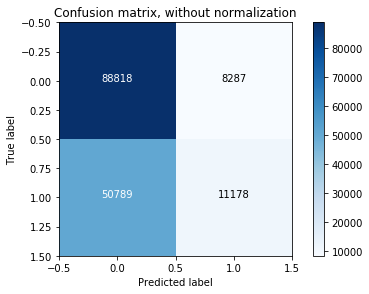

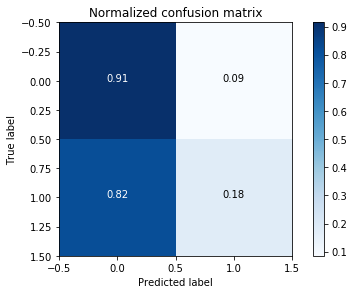

In [20]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* We are applying "Random Forest" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

### ExtraTreesClassifier*  vs RandomForestClassifier 

* from https://stackoverflow.com/questions/22409855/randomforestclassifier-vs-extratreesclassifier-in-scikit-learn  
... the differences for ET:

    1) When choosing variables at a split, samples are drawn from the entire training set instead of a bootstrap sample of the training set.

    2) Splits are chosen completely at random from the range of values in the sample at each split.

    The result from these two things are many more "leaves".

* ET is mostly used to see feature importance

In [21]:
from sklearn.ensemble import ExtraTreesClassifier 
forest = ExtraTreesClassifier(n_estimators=20)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
fnames = [feature_cols[i] for i in indices]

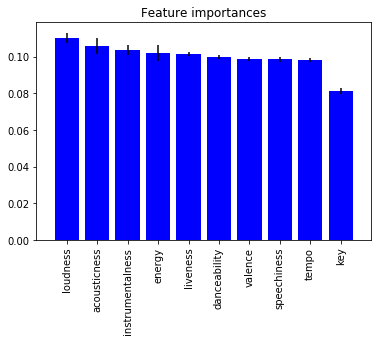

In [22]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), fnames, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

* Predicting the accuracy for "Random Forest" Model.

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)

#fit the data
rfc.fit(X_train,Y_train)

Y_pred_rfc=rfc.predict(X_test)

matrix_rfc = confusion_matrix(Y_test, Y_pred_rfc)

In [24]:
print("Confusion Matrix:")
print(matrix_rfc)
report_rfc = classification_report(Y_test, Y_pred_rfc)
print("Classification Report:")
print(report_rfc)
accuracy_rfc=np.mean(Y_pred_rfc==Y_test)
print("Accuracy for rfc: ",accuracy_rfc)

Confusion Matrix:
[[91909  5196]
 [10832 51135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     97105
           1       0.91      0.83      0.86     61967

   micro avg       0.90      0.90      0.90    159072
   macro avg       0.90      0.89      0.89    159072
weighted avg       0.90      0.90      0.90    159072

Accuracy for rfc:  0.8992405954536311


Confusion matrix, without normalization
[[91909  5196]
 [10832 51135]]
Normalized confusion matrix
[[0.95 0.05]
 [0.17 0.83]]


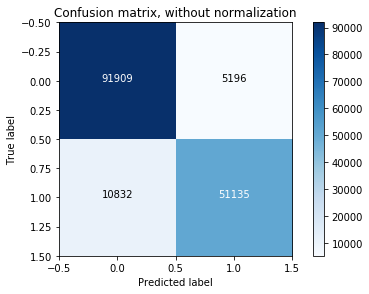

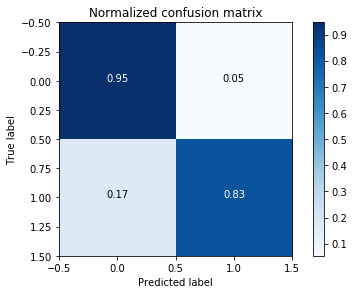

In [25]:
matrix_rfc = confusion_matrix(Y_test, Y_pred_rfc)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_rfc,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_rfc, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* We are applying "K-Nearest Neigbor" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

In [26]:
#knn
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=100,weights='uniform')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [27]:
#knn prediction
Y_pred_knn=knn.predict(X_test)

matrix_knn = confusion_matrix(Y_test, Y_pred_knn)

In [28]:
#Evaluation
from sklearn.metrics import classification_report
#predicted = model.predict(X_test)
#matrix = confusion_matrix(Y_test, predicted)
print("Confusion Matrix:")
print(matrix_knn)
report_knn = classification_report(Y_test, Y_pred_knn)
print("Classification Report:")
print(report_knn)
accuracy_knn=np.mean(Y_pred_knn==Y_test)
print("Accuracy for rfc: ",accuracy_knn)

Confusion Matrix:
[[83538 13567]
 [45892 16075]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74     97105
           1       0.54      0.26      0.35     61967

   micro avg       0.63      0.63      0.63    159072
   macro avg       0.59      0.56      0.54    159072
weighted avg       0.61      0.63      0.59    159072

Accuracy for rfc:  0.6262132870649769


Confusion matrix, without normalization
[[83538 13567]
 [45892 16075]]
Normalized confusion matrix
[[0.86 0.14]
 [0.74 0.26]]


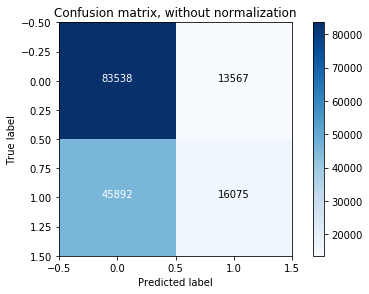

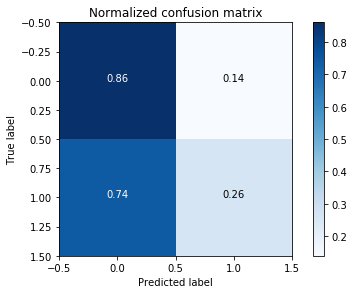

In [29]:
matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_knn,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_knn, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* Cross- validation accuracy for every model is shown below.

In [30]:
# Random forest with cv
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, Y, scoring='accuracy', cv=5)
print (scores)
print (scores.mean())
scores_random_Forest=scores.mean()
print(scores_random_Forest)

[0.98 0.98 0.98 0.98 0.98]
0.9832282850302969
0.9832282850302969


In [31]:
#LOgistic with CV

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=5)
print (scores)
print (scores.mean())
scores_lr=scores.mean()
print(scores_lr)

C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.63 0.63 0.62 0.64 0.61]
0.6258396847395462
0.6258396847395462


In [32]:
#KNN with CV

#from sklearn.model_selection import cross_val_score
scores_knn = cross_val_score(knn, X, Y, scoring='accuracy', cv=5)
print (scores_knn)
print (scores_knn.mean())

[0.63 0.63 0.61 0.64 0.62]
0.6260018776152695


* Plotting the Accuracies for the model KNN, Logistic Regression and Random Forest.

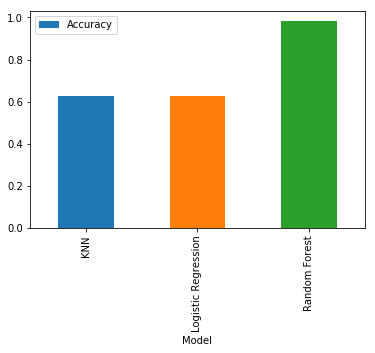

In [33]:
d = {'Model':['KNN','Logistic Regression','Random Forest'],'Accuracy':[scores_knn.mean(),scores_lr,scores_random_Forest]}

agg_scores = pd.DataFrame(data = d)
agg_scores.plot(x='Model',y='Accuracy',kind='bar')

In [34]:
#Random forest confusion matrix with CV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
Y_pred_rfc_cv = cross_val_predict(rfc,X,Y,cv=5)

In [35]:
print('Confusion Matrix')
matrix_rfc_cv = confusion_matrix(Y, Y_pred_rfc_cv)
print(matrix_rfc_cv)
report_rfc = classification_report(Y, Y_pred_rfc_cv)
print("Classification Report:")
print(report_rfc)
accuracy_rfc_cv=np.mean(Y_pred_rfc_cv==Y)
print("Accuracy for rfc: ",scores_random_Forest)

Confusion Matrix
[[319700   3762]
 [  5129 201647]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    323462
           1       0.98      0.98      0.98    206776

   micro avg       0.98      0.98      0.98    530238
   macro avg       0.98      0.98      0.98    530238
weighted avg       0.98      0.98      0.98    530238

Accuracy for rfc:  0.9832282850302969


* As you can see Accuracy of the Random Forest model is higher as compared to Logistic regression and K- Nearest Neighbor.

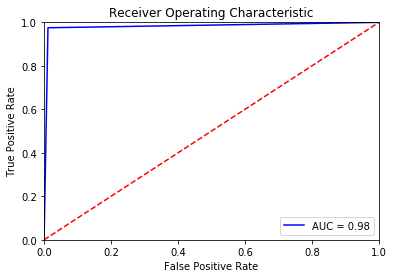

In [36]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Y,Y_pred_rfc_cv)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530238 entries, 0 to 530239
Data columns (total 10 columns):
acousticness        530238 non-null float64
danceability        530238 non-null float64
energy              530238 non-null float64
instrumentalness    530238 non-null float64
key                 530238 non-null float64
liveness            530238 non-null float64
loudness            530238 non-null float64
speechiness         530238 non-null float64
tempo               530238 non-null float64
valence             530238 non-null float64
dtypes: float64(10)
memory usage: 44.5 MB


# Bayesian approach to the problem

In [1]:
%reset -sf

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### some cleaning first (again)

In [11]:
import glob 
import zipfile
import os
import pandas as pd

In [12]:
where_zip_is = 'C:/WD Jimit/MITA Spring 19/Scott/Project/'

In [13]:
zip_ref = zipfile.ZipFile(where_zip_is+'spotify_data_for_students.zip', 'r')
zip_ref.extractall('team23_working_dir')
zip_ref.close()

In [14]:
where_zip_is = 'C:/WD Jimit/MITA Spring 19/Scott/Project/'

In [17]:
path_to_music = where_zip_is+'team23_working_dir/spotify_data_for_students/music_data'
path_to_user = where_zip_is+'team23_working_dir/spotify_data_for_students/user_data'

In [18]:
# following is borrowed from https://medium.freecodecamp.org/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854
os.chdir(path_to_music)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

bcombined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
bcombined_csv.to_csv( "combined_music.csv", index=False,encoding='utf-8-sig')

In [24]:
import pandas as pd
bmusic = pd.read_csv(path_to_music+'/combined_music.csv')

#bmusic = pd.read_csv('C:/WD Jimit/MITA Spring 19/Scott/Project/spotify_data_for_students/music_data/combined_csv.csv')
bmusic.info()
bmusic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265120 entries, 0 to 265119
Data columns (total 26 columns):
Unnamed: 0          265120 non-null int64
acousticness        265120 non-null float64
album_id            265120 non-null object
album_name          265120 non-null object
analysis_url        265120 non-null object
artist_ids          265120 non-null object
artist_names        265120 non-null object
danceability        265119 non-null float64
disc_number         265120 non-null int64
duration_ms         265120 non-null int64
energy              265120 non-null float64
instrumentalness    265120 non-null float64
key                 265120 non-null int64
liveness            265120 non-null float64
loudness            265120 non-null float64
mode                265120 non-null int64
popularity          265120 non-null int64
preview_url         230015 non-null object
song_id             265120 non-null object
song_name           265120 non-null object
speechiness         265119 no

,Unnamed: 0,acousticness,album_id,album_name,analysis_url,artist_ids,artist_names,danceability,disc_number,duration_ms,...,popularity,preview_url,song_id,song_name,speechiness,tempo,time_signature,track_href,track_number,valence
0,0,0.1080,67nqYhvjDyJXGD64937Lw3,The Beach Boys' Christmas Album,https://api.spotify.com/v1/audio-analysis/5xlS...,"3oDbviiivRWhXwIE8hxkVV,03IJEZ6IynYczgge2uC4YD,...","The Beach Boys,Mark Linett,Sweet,Larry Walsh",0.602,1,118840,...,72,NaN,5xlS0QkVrSH7ssEbBgBzbM,Little Saint Nick - 1991 Remix,0.0328,130.594,4.0,https://api.spotify.com/v1/tracks/5xlS0QkVrSH7...,1,0.971
1,1,0.4250,4S2ZR5njbJez1rV8DV5Vtl,Live In Japan,https://api.spotify.com/v1/audio-analysis/4gdh...,7FIoB5PHdrMZVC3q2HE5MS,George Harrison,0.611,2,211320,...,62,NaN,4gdhsYfXJoVQsWpbmh32Da,Here Comes The Sun - Live In Japan/1991/Remast...,0.0295,125.240,4.0,https://api.spotify.com/v1/tracks/4gdhsYfXJoVQ...,2,0.639
2,2,0.0468,0IyCnBPnQXafGgV0Jsa5Kq,WWE: Uncaged VII,https://api.spotify.com/v1/audio-analysis/3oix...,"6irRU9KRGb0cMtlsBZMg2i,0spHbv2fw49lDMkbOAdaqX","Jim Johnston,WWE",0.737,1,208573,...,18,https://p.scdn.co/mp3-preview/550b95f0c09acdc4...,3oixYd5Q41mfwfwpc2LuYx,Beware the Bull (1991),0.0344,145.003,4.0,https://api.spotify.com/v1/tracks/3oixYd5Q41mf...,4,0.859


In [34]:
# following is borrowed from https://medium.freecodecamp.org/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854


os.chdir(path_to_user)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

ccombined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
ccombined_csv.to_csv( "combined_music.csv", index=False, header=True)



C:\Users\jimaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [37]:
buser = pd.read_csv(path_to_user+'/combined_user.csv')

In [38]:
buser.head(3)

,Unnamed: 0,acousticness,danceability,database_id,energy,instrumentalness,key,liveness,loudness,mode,preview_url,song_name,speechiness,spotify_id,tempo,user_id,user_response,user_session,valence
0,0.0,0.0904,0.374,5bb7ac930c27ee4c381dd9dc,0.850,0.000000,4,0.116,-5.657,0,NaN,NaN,0.0404,NaN,125.796,0.0,0.0,1.0,0.348
1,1.0,0.3530,0.505,5bb7ac960c27ee4c381dda8b,0.366,0.000014,5,0.124,-9.197,1,NaN,NaN,0.0250,NaN,100.533,0.0,0.0,1.0,0.115
2,2.0,0.0159,0.674,5bb7ac910c27ee4c381dd91b,0.943,0.000000,0,0.504,-3.413,1,NaN,NaN,0.0408,NaN,118.060,0.0,1.0,1.0,0.856


In [42]:
user_data_clean = buser;

In [43]:
music_data_clean = bmusic;

In [45]:
user_data_relevant = user_data_clean.drop(['Unnamed: 0','user_session','user_id','database_id','preview_url','song_name','spotify_id'], axis=1);

In [46]:
user_data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5372 entries, 0 to 5371
Data columns (total 12 columns):
acousticness        5372 non-null float64
danceability        5372 non-null float64
energy              5372 non-null float64
instrumentalness    5372 non-null float64
key                 5372 non-null int64
liveness            5372 non-null float64
loudness            5372 non-null float64
mode                5372 non-null int64
speechiness         5372 non-null float64
tempo               5372 non-null float64
user_response       3899 non-null float64
valence             5372 non-null float64
dtypes: float64(10), int64(2)
memory usage: 503.7 KB


In [47]:
music_data_relevant = music_data_clean.drop(['Unnamed: 0','album_id','album_name','analysis_url','artist_ids','artist_names','disc_number','duration_ms','preview_url','song_id','song_name','track_href','track_number'],axis=1);

In [48]:
music_data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265120 entries, 0 to 265119
Data columns (total 13 columns):
acousticness        265120 non-null float64
danceability        265119 non-null float64
energy              265120 non-null float64
instrumentalness    265120 non-null float64
key                 265120 non-null int64
liveness            265120 non-null float64
loudness            265120 non-null float64
mode                265120 non-null int64
popularity          265120 non-null int64
speechiness         265119 non-null float64
tempo               265120 non-null float64
time_signature      265119 non-null float64
valence             265119 non-null float64
dtypes: float64(10), int64(3)
memory usage: 26.3 MB


In [49]:
user_data_relevant=user_data_relevant.sort_index(axis=1);

In [50]:
music_data_relevant=music_data_relevant.sort_index(axis=1)

### Working on user data

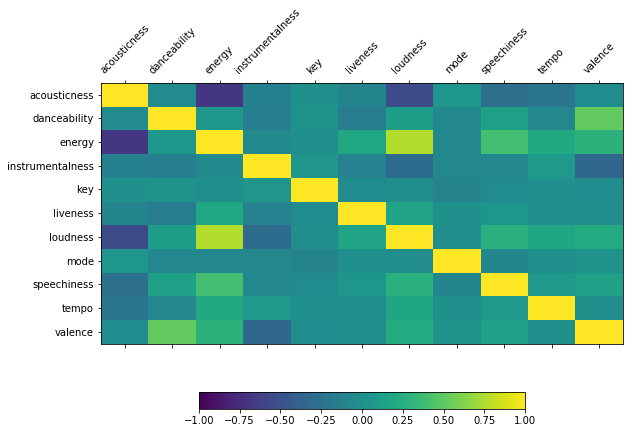

In [51]:
user_data_relevant_no_target=user_data_relevant.drop(['user_response'], 1)
user_correlation=user_data_relevant_no_target.corr(method='spearman')

user_columns = list(user_correlation)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(user_correlation, vmin=-1, vmax=1)
fig.colorbar(cax,orientation='horizontal',fraction=.05)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# ax.set_xticklabels(range(1,12))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_xticklabels(user_columns)
ax.set_yticklabels(user_columns)
ax.set_aspect(0.5)
plt.show()

In [52]:
user_correlation=user_correlation.abs()
upper = user_correlation.where(np.triu(np.ones(user_correlation.shape), k=1).astype(np.bool))
# print(upper)

In [53]:
s = user_correlation.unstack()
so = s.sort_values(kind="quicksort")

for i in range(11*11):
    if (so.values[i]>0.5 and so.values[i]!=1.0):
        print (so.index[i],so[i])

('valence', 'danceability') 0.5198428293142131
('danceability', 'valence') 0.5198428293142131
('acousticness', 'loudness') 0.5404306665698603
('loudness', 'acousticness') 0.5404306665698603
('energy', 'acousticness') 0.6734494211531515
('acousticness', 'energy') 0.6734494211531515
('energy', 'loudness') 0.7671296212583155
('loudness', 'energy') 0.7671296212583155


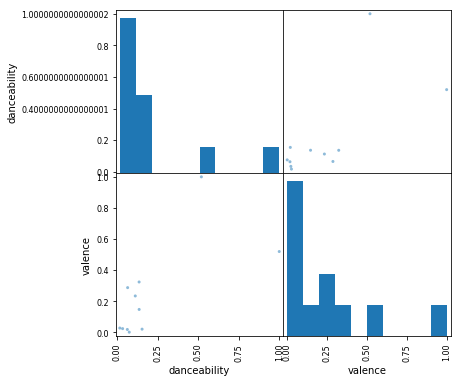

In [54]:
pd_plot0 = user_correlation[['danceability','valence']]
pd.plotting.scatter_matrix(pd_plot0, figsize=(6, 6))
plt.show()

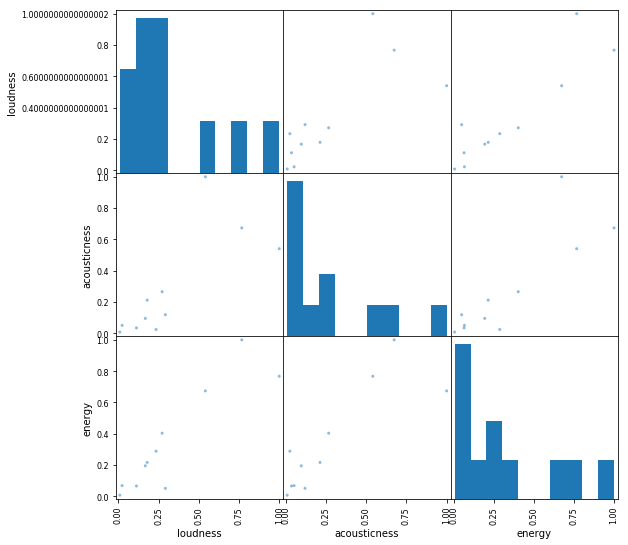

In [55]:
pd_plot1 = user_correlation[['loudness','acousticness','energy']]
pd.plotting.scatter_matrix(pd_plot1, figsize=(9, 9))
plt.show()

### we are removing highly correlated features

In [56]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print (to_drop)
user_data_relevant_no_target_fixcorr = user_data_relevant_no_target.drop(to_drop,1)
user_data_relevant_no_target_fixcorr.info()

['energy', 'loudness', 'valence']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5372 entries, 0 to 5371
Data columns (total 8 columns):
acousticness        5372 non-null float64
danceability        5372 non-null float64
instrumentalness    5372 non-null float64
key                 5372 non-null int64
liveness            5372 non-null float64
mode                5372 non-null int64
speechiness         5372 non-null float64
tempo               5372 non-null float64
dtypes: float64(6), int64(2)
memory usage: 335.8 KB


### looking at low variability 

In [57]:
(user_data_relevant_no_target_fixcorr > 0).all()

acousticness        False
danceability        False
instrumentalness    False
key                 False
liveness            False
mode                False
speechiness         False
tempo               False
dtype: bool

In [58]:
# user_data_relevant_no_target_fixcorr.plot(kind='hist',subplots=True, sharex=False, sharey=False, figsize=(12,12))
# plt.show()
user_data_relevant_no_target_fixcorr.head()

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo
0,0.0904,0.374,0.000000,4,0.1160,0,0.0404,125.796
1,0.3530,0.505,0.000014,5,0.1240,1,0.0250,100.533
2,0.0159,0.674,0.000000,0,0.5040,1,0.0408,118.060
3,0.1860,0.602,0.000000,0,0.1220,1,0.0365,118.026
4,0.0876,0.626,0.000077,8,0.0801,0,0.0339,149.990


In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()
print(scaler.fit(user_data_relevant_no_target_fixcorr))
print(scaler.data_max_)
print(scaler.transform(user_data_relevant_no_target_fixcorr))

MinMaxScaler(copy=True, feature_range=(0, 1))
[  0.995   0.96    0.98   11.      0.974   1.      0.741 207.959]
[[9.08542714e-02 3.89583333e-01 0.00000000e+00 ... 0.00000000e+00
  5.45209177e-02 6.04907698e-01]
 [3.54773869e-01 5.26041667e-01 1.41836735e-05 ... 1.00000000e+00
  3.37381916e-02 4.83427022e-01]
 [1.59798995e-02 7.02083333e-01 0.00000000e+00 ... 1.00000000e+00
  5.50607287e-02 5.67708058e-01]
 ...
 [7.12562814e-01 5.35416667e-01 3.65306122e-04 ... 0.00000000e+00
  5.18218623e-02 7.68670748e-01]
 [8.94472362e-01 5.16666667e-01 9.28571429e-01 ... 1.00000000e+00
  4.85829960e-02 4.96905640e-01]
 [7.33668342e-01 5.25000000e-01 3.83673469e-01 ... 1.00000000e+00
  6.47773279e-02 8.45036762e-01]]


C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


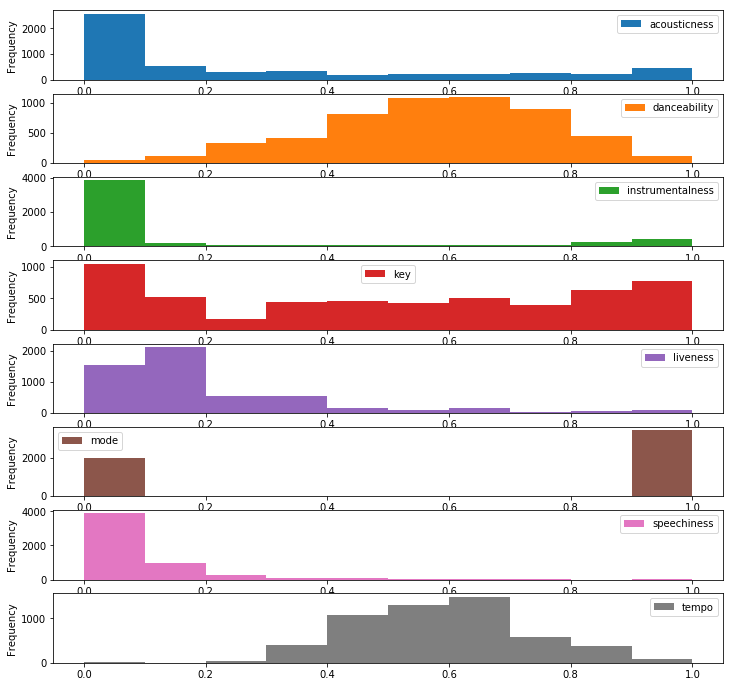

In [62]:
scaled_user_data_relevant_no_target_fixcorr = pd.DataFrame(scaler.fit_transform(user_data_relevant_no_target_fixcorr),columns = user_data_relevant_no_target_fixcorr.columns)
scaled_user_data_relevant_no_target_fixcorr.plot(legend=True,kind='hist',subplots=True, sharex=False, sharey=False, figsize=(12,12))
plt.show()

In [63]:
scaled_user_data_relevant_no_target_fixcorr.head()

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo
0,0.090854,0.389583,0.000000,0.363636,0.119097,0.0,0.054521,0.604908
1,0.354774,0.526042,0.000014,0.454545,0.127310,1.0,0.033738,0.483427
2,0.015980,0.702083,0.000000,0.000000,0.517454,1.0,0.055061,0.567708
3,0.186935,0.627083,0.000000,0.000000,0.125257,1.0,0.049258,0.567545
4,0.088040,0.652083,0.000079,0.727273,0.082238,0.0,0.045749,0.721248


In [64]:
scaled_user_data_relevant_no_target_fixcorr.var() > .1

acousticness         True
danceability        False
instrumentalness     True
key                  True
liveness            False
mode                 True
speechiness         False
tempo               False
dtype: bool

### drop low variance features

In [65]:
lowvardrop_scaled_user_data_relevant_no_target_fixcorr = scaled_user_data_relevant_no_target_fixcorr.loc[:, scaled_user_data_relevant_no_target_fixcorr.var() > .1]
lowvardrop_scaled_user_data_relevant_no_target_fixcorr.head()

,acousticness,instrumentalness,key,mode
0,0.090854,0.000000,0.363636,0.0
1,0.354774,0.000014,0.454545,1.0
2,0.015980,0.000000,0.000000,1.0
3,0.186935,0.000000,0.000000,1.0
4,0.088040,0.000079,0.727273,0.0


### add back the target feature

In [66]:
cleaned_user_data = lowvardrop_scaled_user_data_relevant_no_target_fixcorr
cleaned_user_data['user_response']=user_data_clean[['user_response']]
cleaned_user_data.head()

C:\Users\jimaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,acousticness,instrumentalness,key,mode,user_response
0,0.090854,0.000000,0.363636,0.0,0.0
1,0.354774,0.000014,0.454545,1.0,0.0
2,0.015980,0.000000,0.000000,1.0,1.0
3,0.186935,0.000000,0.000000,1.0,0.0
4,0.088040,0.000079,0.727273,0.0,0.0


### User data ready

### Working on music data

In [67]:
music_data_relevant.isnull().sum()

acousticness        0
danceability        1
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         1
tempo               0
time_signature      1
valence             1
dtype: int64

In [68]:
music_data_relevant=music_data_relevant.dropna()

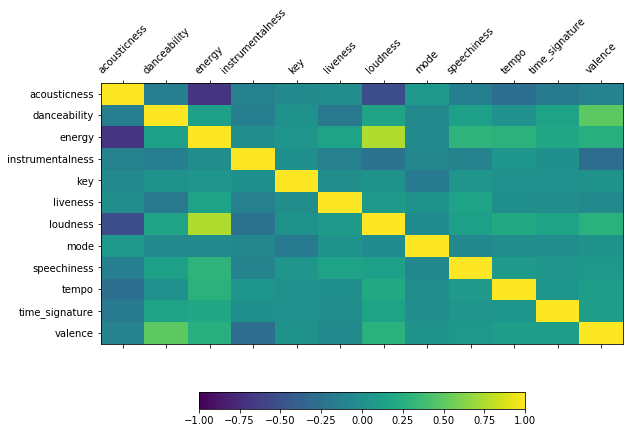

In [69]:
music_data_relevant_no_target=music_data_relevant.drop(['popularity'], 1)
music_correlation=music_data_relevant_no_target.corr(method='spearman')

music_columns = list(music_correlation)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(music_correlation, vmin=-1, vmax=1)
fig.colorbar(cax,orientation='horizontal',fraction=.05)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# ax.set_xticklabels(range(1,13))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_xticklabels(music_columns)
ax.set_yticklabels(music_columns)
ax.set_aspect(0.5)
plt.show()

In [70]:
music_correlation=music_correlation.abs()
upper_music = music_correlation.where(np.triu(np.ones(music_correlation.shape), k=1).astype(np.bool))
# print(upper)

In [71]:
sm = music_correlation.unstack()
som = sm.sort_values(kind="quicksort")
# print (som.values)
for i in range(12*12):
    if (som.values[i]>0.4 and som.values[i]!=1.0):
        print (som.index[i],som[i])

('valence', 'danceability') 0.49515508062774016
('danceability', 'valence') 0.49515508062774016
('acousticness', 'loudness') 0.5252189428842148
('loudness', 'acousticness') 0.5252189428842148
('energy', 'acousticness') 0.6931493218475996
('acousticness', 'energy') 0.6931493218475996
('loudness', 'energy') 0.7632602442250978
('energy', 'loudness') 0.7632602442250978


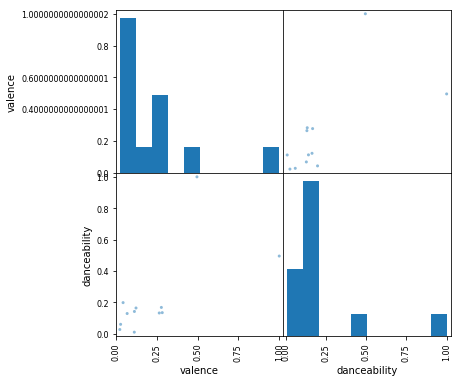

In [72]:
pd_plot2 = music_correlation[['valence', 'danceability']]
pd.plotting.scatter_matrix(pd_plot2, figsize=(6, 6))
plt.show()

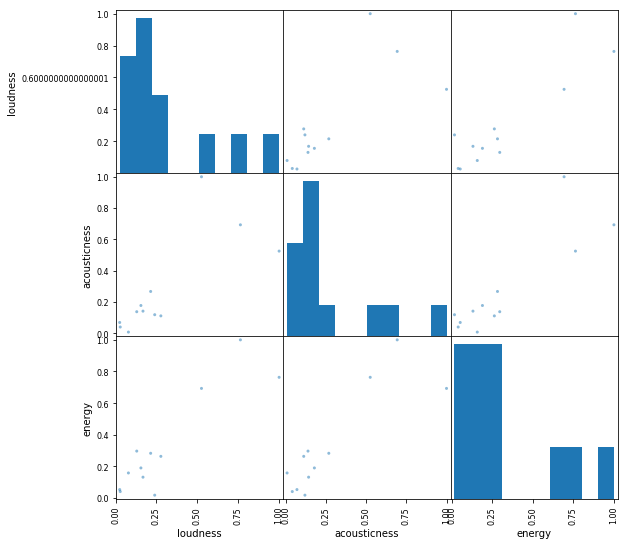

In [73]:
pd_plot3 = music_correlation[['loudness', 'acousticness','energy']]
pd.plotting.scatter_matrix(pd_plot3, figsize=(9, 9))
plt.show()

### we are removing highly correlated features

In [74]:
to_drop_music = [column for column in upper_music.columns if any(upper_music[column] > 0.45)]
print (to_drop_music)
music_data_relevant_no_target_fixcorr = music_data_relevant_no_target.drop(to_drop_music,1)
music_data_relevant_no_target_fixcorr.info()

['energy', 'loudness', 'valence']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 265119 entries, 0 to 265119
Data columns (total 9 columns):
acousticness        265119 non-null float64
danceability        265119 non-null float64
instrumentalness    265119 non-null float64
key                 265119 non-null int64
liveness            265119 non-null float64
mode                265119 non-null int64
speechiness         265119 non-null float64
tempo               265119 non-null float64
time_signature      265119 non-null float64
dtypes: float64(7), int64(2)
memory usage: 20.2 MB


### looking at low variability 

In [75]:
(music_data_relevant_no_target_fixcorr > 0).all()

acousticness        False
danceability        False
instrumentalness    False
key                 False
liveness            False
mode                False
speechiness         False
tempo               False
time_signature      False
dtype: bool

In [76]:
# music_data_relevant_no_target_fixcorr.plot(kind='hist',subplots=True, sharex=False, sharey=False, figsize=(12,12))
# plt.show()
music_data_relevant_no_target_fixcorr.head()

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature
0,0.1080,0.602,0.000000,11,0.0512,1,0.0328,130.594,4.0
1,0.4250,0.611,0.000954,9,0.8780,1,0.0295,125.240,4.0
2,0.0468,0.737,0.888000,0,0.1050,1,0.0344,145.003,4.0
3,0.9480,0.340,0.815000,8,0.0899,1,0.0284,110.588,4.0
4,0.6300,0.587,0.000000,8,0.2240,1,0.0296,131.727,3.0


In [77]:
music_data_relevant_no_target_fixcorr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265119 entries, 0 to 265119
Data columns (total 9 columns):
acousticness        265119 non-null float64
danceability        265119 non-null float64
instrumentalness    265119 non-null float64
key                 265119 non-null int64
liveness            265119 non-null float64
mode                265119 non-null int64
speechiness         265119 non-null float64
tempo               265119 non-null float64
time_signature      265119 non-null float64
dtypes: float64(7), int64(2)
memory usage: 20.2 MB


C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


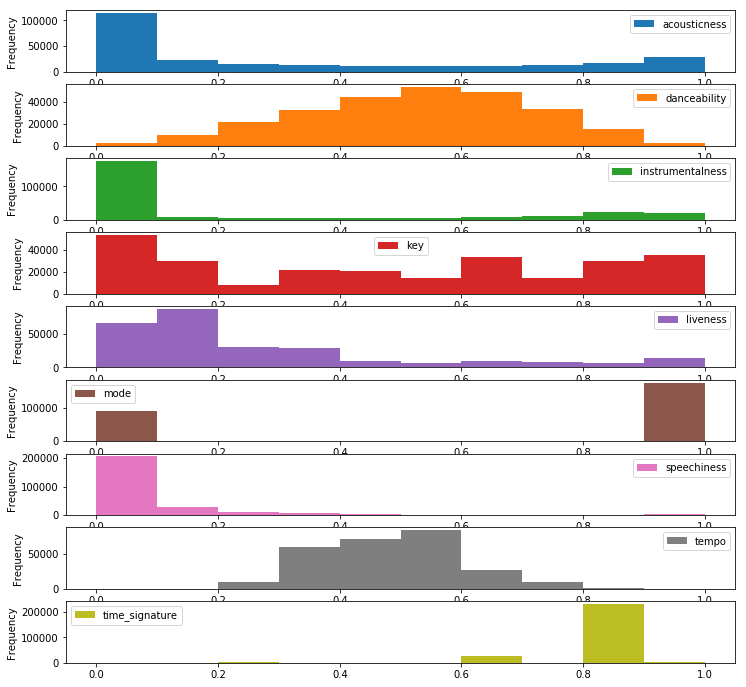

In [78]:
scaled_music_data_relevant_no_target_fixcorr = pd.DataFrame(scaler.fit_transform(music_data_relevant_no_target_fixcorr),columns = music_data_relevant_no_target_fixcorr.columns)
scaled_music_data_relevant_no_target_fixcorr.plot(legend=True,kind='hist',subplots=True, sharex=False, sharey=False, figsize=(12,12))
plt.show()

In [79]:
scaled_music_data_relevant_no_target_fixcorr.head()

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature
0,0.108434,0.608081,0.000000,1.000000,0.0512,1.0,0.033884,0.522403,0.8
1,0.426707,0.617172,0.000954,0.818182,0.8780,1.0,0.030475,0.500986,0.8
2,0.046988,0.744444,0.888000,0.000000,0.1050,1.0,0.035537,0.580042,0.8
3,0.951807,0.343434,0.815000,0.727273,0.0899,1.0,0.029339,0.442375,0.8
4,0.632530,0.592929,0.000000,0.727273,0.2240,1.0,0.030579,0.526935,0.6


In [80]:
scaled_music_data_relevant_no_target_fixcorr.var() > .1

acousticness         True
danceability        False
instrumentalness     True
key                  True
liveness            False
mode                 True
speechiness         False
tempo               False
time_signature      False
dtype: bool

### drop low variance

In [81]:
lowvardrop_scaled_music_data_relevant_no_target_fixcorr = scaled_music_data_relevant_no_target_fixcorr.loc[:, scaled_music_data_relevant_no_target_fixcorr.var() > .1]
lowvardrop_scaled_music_data_relevant_no_target_fixcorr.head()

,acousticness,instrumentalness,key,mode
0,0.108434,0.000000,1.000000,1.0
1,0.426707,0.000954,0.818182,1.0
2,0.046988,0.888000,0.000000,1.0
3,0.951807,0.815000,0.727273,1.0
4,0.632530,0.000000,0.727273,1.0


### add back the target feature

In [82]:
lowvardrop_scaled_music_data_relevant_with_target_fixcorr = lowvardrop_scaled_music_data_relevant_no_target_fixcorr
lowvardrop_scaled_music_data_relevant_with_target_fixcorr['popularity']=music_data_clean[['popularity']]

cleaned_music_data = pd.DataFrame(scaler.fit_transform(lowvardrop_scaled_music_data_relevant_with_target_fixcorr),columns = lowvardrop_scaled_music_data_relevant_with_target_fixcorr.columns)
cleaned_music_data.head()

C:\Users\jimaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jimaa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,acousticness,instrumentalness,key,mode,popularity
0,0.108434,0.000000,1.000000,1.0,0.847059
1,0.426707,0.000954,0.818182,1.0,0.729412
2,0.046988,0.888000,0.000000,1.0,0.211765
3,0.951807,0.815000,0.727273,1.0,0.211765
4,0.632530,0.000000,0.727273,1.0,0.623529


### Music data ready

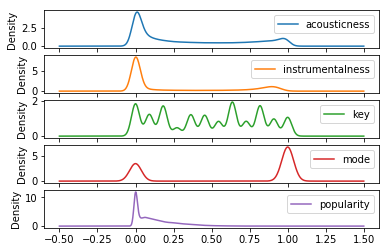

In [83]:
cleaned_music_data.plot(kind='density', subplots=True, sharex=False)
# plt.savefig("1.png")
plt.show()

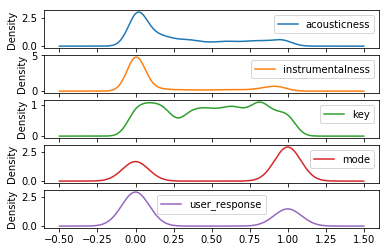

In [84]:
cleaned_user_data.plot(kind='density', subplots=True, sharex=False)
# plt.savefig("2.png")
plt.show()

## PYMC3 Bayesian linear regresion

In [92]:
user_features = cleaned_user_data.get(['acousticness','instrumentalness','key','mode'])
user_target = cleaned_user_data.get(['user_response'])

In [93]:
music_features = cleaned_music_data.get(['acousticness','instrumentalness','key','mode'])
music_target = cleaned_music_data.get(['popularity'])

# Importing Probabilistic programming library for Bayesian Interpretation

In [94]:
import pymc3 as pm;

# Building Bayesian Linear Regression Model 

In [98]:
linear_Bayesian = pm.Model()

with linear_Bayesian:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=4)
    sigma = pm.HalfNormal('sigma', sd=1)
    mu = alpha + beta*music_features
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=music_target)

# The MAP is returned as a parameter point

In [99]:
map_estimate = pm.find_MAP(model=linear_Bayesian)

map_estimate

logp = 6.2368e+05, ||grad|| = 11,767: 100%|██████████| 16/16 [00:01<00:00, 13.42it/s]       


{'alpha': array(0.12239945),
 'beta': array([-0.0256615 , -0.04493423, -0.00995495, -0.00569317]),
 'sigma_log__': array(-2.00709074),
 'sigma': array(0.13437905)}

In [100]:
with linear_Bayesian:
    linear_Bayesian_trace = pm.sample(100, chains=2, nuts_kwargs=dict(target_accept=.95))

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 1200/1200 [30:39<00:00,  1.62draws/s] 


In [101]:
pm.summary(linear_Bayesian_trace).round(5)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.12240,0.00017,0.00001,0.12206,0.12271,141.14820,0.99632
beta__0,-0.02564,0.00059,0.00004,-0.02671,-0.02442,98.64351,0.99829
beta__1,-0.04499,0.00064,0.00004,-0.04604,-0.04380,171.85516,0.99926
beta__2,-0.00995,0.00049,0.00004,-0.01095,-0.00912,151.97886,0.99713
beta__3,-0.00571,0.00039,0.00003,-0.00634,-0.00488,166.40584,0.99854
sigma,0.13438,0.00008,0.00001,0.13421,0.13452,187.97770,0.99752


C:\Users\jimaa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


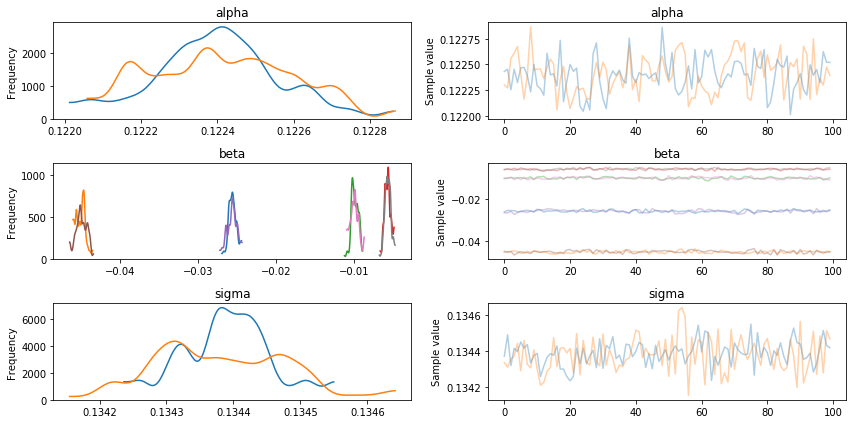

In [102]:
pm.traceplot(linear_Bayesian_trace);
# plt.savefig("3.png")
plt.show()

# Posterior analysis

In [104]:
with linear_Bayesian:
    linear_Bayesian_trace_slicing = pm.sample(1000, step=pm.Slice())

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [18:03<00:00,  2.00draws/s]


In [105]:
pm.summary(linear_Bayesian_trace_slicing).round(5)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.12240,0.00019,0.00001,0.12203,0.12277,1236.73179,0.99991
beta__0,-0.02565,0.00059,0.00001,-0.02674,-0.02442,2174.15741,1.00006
beta__1,-0.04491,0.00067,0.00001,-0.04620,-0.04358,2290.58288,0.99997
beta__2,-0.00995,0.00053,0.00001,-0.01093,-0.00891,1919.46529,1.00100
beta__3,-0.00568,0.00037,0.00001,-0.00643,-0.00500,1868.11675,0.99968
sigma,0.13438,0.00009,0.00000,0.13420,0.13456,4067.34499,1.00017


C:\Users\jimaa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


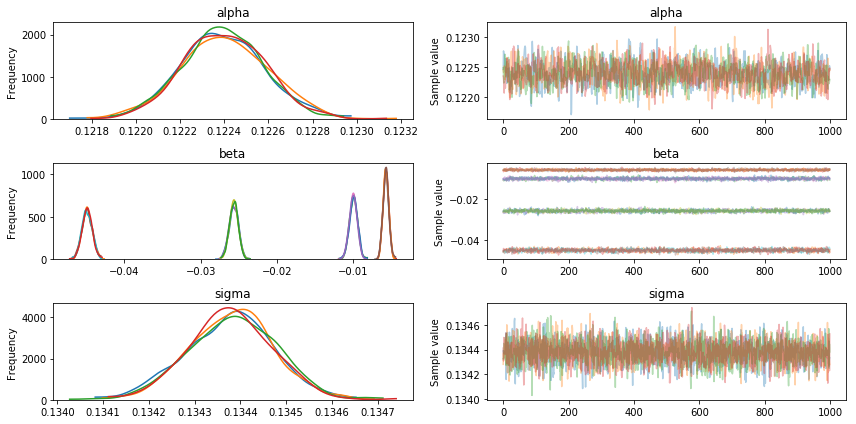

In [106]:
pm.traceplot(linear_Bayesian_trace_slicing);
plt.savefig("4.png")
plt.show()

## PYMC3 Bayesian logistic linear regresion

In [111]:
basic_logistic_model = pm.Model()

with basic_logistic_model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=4)
    sigma = pm.HalfNormal('sigma', sd=1)
    mu = pm.math.sigmoid(alpha+beta*user_features)
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=user_target)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (5372,4) and requested shape (5372,1)

In [ ]:
map_estimate = pm.find_MAP(model=basic_logistic_model)

map_estimate

In [ ]:
with basic_logistic_model:

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(2000, step=step)

In [ ]:
pm.traceplot(trace);
plt.savefig("5.png")
plt.show()

In [ ]:
pm.summary(trace).round(2)